## Logistic Regression

In [1]:
import sys
import numpy
import pandas
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

## Load Data


- datasets.load_iris() return:
```json
{
    'data': array([[5.1, 3.5, 1.4, 0.2], [4.9, 3. , 1.4, 0.2] ... ]]),
    'target': array([0, 0, 0, 0, 0]),
    'target_names': array(['setosa', 'versicolor', 'virginica'], dtype='<U10'),
    ...
}

```

In [2]:
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

## 1. Slice data

Data dilakukan slice dengan perbandingan 80:20 balance. 80% data pertama masuk ke data train, 20% data terakhir masuk ke data test.

In [3]:
# Data unique dari target
target = np.unique(y)

# Presentase Data train
p_data_train = 80

X_train = []
y_train = []
X_test = []
y_test = []

# loop sebanyak data target unik
for i in target:
    
    # mengambil index data y yang sama dengan i
    target_i = np.where(y == i)[0]
    
    # mencari index data 80% pertama dari setiap data unik y (target)
    temp = int(len(target_i) * 80 / 100) + target_i[0]
    for k in target_i:
        
        if k < temp:
            # mengambil 80% data pertama sebagai data train
            X_train.append(X[k])
            y_train.append(y[k])
        else:
            # mengambil 20% data terakhir sebagai data test
            X_test.append(X[k])
            y_test.append(y[k])

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

## 2. Visualize Training data

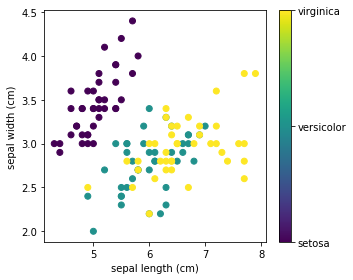

In [4]:
x_index = 0
y_index = 1

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.figure(figsize=(5, 4))
plt.scatter(X_train[:, x_index], X_train[:, y_index], c=y_train)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])

plt.tight_layout()
plt.show()

## 3. Sigmoid Function

$$ g(z) = \frac {1}{1 + e^{-z}} $$

$$ h(\theta) = \theta^T x $$

$$ z = \theta^T x $$



## 4. Cost Function dan Regularization

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})^2 + \frac{\lambda}{2m} \sum_{j=1}^{n} \theta_{j} $$

$$ J(\theta) = - \frac{1}{m} \sum_{i=1}^{m}(y^{(i)} log(h_{\theta}(x^{i}) + (1 - y^{(i)}) log(1 - h_\theta(x^{(i)}))) + \frac{\lambda}{2m} \sum_{j=1}{n} \theta_{j}^2  $$

## 5. Gradient Descent

Without Regularization: 
$$ repeat \ until \ convergen \ \left\{ \ \theta_{j} = \theta_{j} - \alpha \frac{1}{m} \sum_{i=1}^{m} (h_{\theta} (x^{(i)}) - y^{(i)}) x_{j}^{(i)} \ \right. $$
Dengan $ x_{0} = 1 $ dan $ j \in \{0, 1, 2, 3 ...\} $

With Regularization
$$ repeat \ until \ convergence \ \left\{ \begin{array}\\ \theta_{0} = \theta_{0} - \alpha \frac{1}{m} \sum_{i=1}^{m} (h_{\theta} (x^{(i)}) - y^{(i)}) x_{0}^{(i)} \\ \theta_{j} = \theta_{j} - \alpha \frac{1}{m} (\sum_{i=1}^{m} (h_{\theta} (x^{(i)}) - y^{(i)}) x_{j}^{(i)} - \lambda \theta_{j}) \end{array}\\ \right. $$
Dengan $ j \in \{1, 2, 3 ...\} $

In [5]:
class LogisticRegression():
    
    def __init__(self, lr=0.001, n_iter=100, regu=None, lb=100):
        self.lr = lr
        self.n_iter = n_iter
        self.regu = regu
        self.lb = lb
        self.cost_score = []
        
    def sigmoid(self, Z):
        '''
        Sigmoid
        
        Parameters
        ----------
        Z : [z1, z2, z3, ...]
        
        Return
        ------
        [g1, g2, g3, ...]
        
        '''
        Z = np.array(Z)
        
        return 1 / (1 + np.exp(-Z))
    
    def hypothesis(self, theta, X):
        '''
        Hyphotesis
        
        Parameters
        ----------
        theta : [[theta1], [theta2], ..] as matrix
        
        X : [[x1, x2, x3, x4 .. xn], [x1, x2, x3, x4 .. xn]] matrix
        
        Return
        ------
        [h1, h2, h3 ...]
        '''
        theta = np.array(theta)
        X = np.array(X)
        
        return np.matmul(theta.T, X).flatten()
    
    def cost(self, theta, h, y):
        '''
        Cost
        
        Parameters
        ----------
        theta : [[theta1], [theta2], ..]
        
        h : [h1, h2, h3 ...]
        
        y : [0, 0, 0, 1, 1, 2, 2, 2 ...]
        
        self.lb : lambda untuk regularization
        
        Return
        ------
        float
        '''
        theta = theta.flatten()
        m = len(y)
        
        # persamaan tanpa regularization
        j = -(np.sum(y * np.log(h) + (1 - y) * np.log(1 - h)) / m)
        if self.regu is not None:
            if self.regu == 'l2':
                # Theta 0 tidak kena regularization
                exc_theta = theta[1:len(theta)]
                square_theta = np.power(exc_theta, 2)
                
                # dengan regularization
                j = j + self.lb * np.sum(square_theta) / (2 * m)
        return j
    
    
    def gradientDescent(self, X, y, theta, lr):
        '''
        Gradient descent
        
        Parameters
        ----------
        X : [[x1, x2, x3, x4 .. xn], [x1, x2, x3, x4 .. xn]] matrix
        
        y : [0, 0, 0, 1, 1, 2, 2, 2 ...]
                
        theta : [[theta1], [theta2], ..] as matrix
        
        Return
        ------
        [t1, t2, t3 ...]
        
        '''
        new_theta = theta.flatten()
        m = len(y)
        cs = []
        for i in range(self.n_iter):
            # Hyphotesis dan sigmoid
            z = self.hypothesis(np.array([new_theta]).T, X.T)
            g = self.sigmoid(z)
            
            # hypotesisi - y
            c = g - y
            
            # simultaneous update
            old_theta = new_theta
            new_theta = []
            
            # Update setiap theta
            for theta_i in range(len(old_theta)):
                sigma = 0
                
                # hitung sigma pada persamaan
                for c_i, x_i in zip(c, X):
                    sigma += c_i * x_i[theta_i]
                    
                # jika menggunakan regularization
                if self.regu is not None and self.regu == 'l2' and theta_i != 0:
                    new_theta.append(old_theta[theta_i] - (lr / m) * (sigma + self.lb * old_theta[theta_i]))
                else:
                    new_theta.append(old_theta[theta_i] - lr * sigma / m)
            cs.append(self.cost(np.array([new_theta]).T, g, y))
        
        self.cost_score.append(cs)
        return new_theta
        
    
    def fit(self, X, y):
        '''
        Function fit
        
        Parameters
        ----------
        X : [[x1, x2, x3, x4 .. xn], [x1, x2, x3, x4 .. xn]]
        
        y : [0, 0, 0, 1, 1, 2, 2, 2 ...]

        '''
        # menambah index 0 setiap feature dengan nilai 1
        X = np.insert(X, 0, 1, axis=1)
        self.theta = []
        
        # one vs Rest method
        for i in np.unique(y):
            y_copy = np.where(y == i, 1, 0)
            theta = np.zeros((X.shape[1], 1))
            
            # mencari gradient descent
            self.theta.append(self.gradientDescent(X, y_copy, theta, self.lr))
            
        return self.theta
    
    def predict_prob(self, X):
        '''
        Predict Probability
        
        Parameters
        ----------
        
        X : [[x1, x2, x3, x4 .. xn], [x1, x2, x3, x4 .. xn]]
        
        Return
        ------
        [[probtheta1, probtheta2, probtheta3]]
        
        '''
        # menambahkan feature ke 0 dengan angka 1
        X = np.insert(X, 0, 1, axis=1)
        prob = []
        
        # menghitung probabilitas dengan sigmoid
        for t in self.theta:
            t_np = np.array([t]).T
            z = self.hypothesis(t_np, X.T)
            h = self.sigmoid(z)
            prob.append(h)
        prob = np.array(prob)
        prob = prob.T
        return prob
    
    def predict(self, X):
        '''
        Prediction
        
        Parameter
        ---------
        
        X : [[x1, x2, x3, x4 .. xn], [x1, x2, x3, x4 .. xn]]
        
        Return
        ------
        
        [class, class, class]
        '''
        # Mencari probabilitas prediksi
        k = self.predict_prob(X)
        has = []
        for i in k:
            # Probabilitas terbesar adalah prediksinya
            index = np.where(i == np.amax(i))[0]
            has.append(index)
        return has


## 6. Train Logistic Regression algorithm on the training data, set learning rate: 0.001 and maximum iteration: 100

In [6]:
log_regu = LogisticRegression(lr=0.1, n_iter=100, regu='l2', lb=10)
theta = log_regu.fit(X_train, y_train)
theta

[[0.17073949611905145, -0.6989295493716644, 1.0053230671446127],
 [-0.008817448047496474, 0.15609654420176614, -0.5310958062785978],
 [-0.29183969603011295, 0.2961085251883072, -0.6719577812298043]]

## 7. Plot the decision boundary using matplotlib.

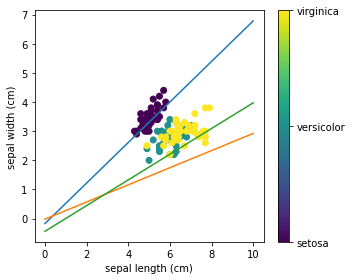

In [7]:
x_index = 0
y_index = 1

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])
# 
plot_x = np.linspace(0,10,100)
plot_y0 = -(theta[0][0]+theta[0][1]*plot_x) / theta[0][2]
plot_y1 = -(theta[1][0]+theta[1][1]*plot_x) / theta[1][2]
plot_y2 = -(theta[2][0]+theta[2][1]*plot_x) / theta[2][2]

plt.figure(figsize=(5, 4))
plt.scatter(X_train[:, x_index], X_train[:, y_index], c=y_train)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.plot(plot_x, plot_y0)
plt.plot(plot_x, plot_y1)
plt.plot(plot_x, plot_y2)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])

plt.tight_layout()
plt.show()

## 8. Test Logistic Regression model on the test data, and calculate the accuracy

In [8]:
p = log_regu.predict(X_test)

# Menghitung akurasi
count = 0
for p_i, y_i in zip(p, y_test):
    if p_i == y_i:
        count += 1

print(f'accuracy: {count / len(y_test)}')

accuracy: 0.6333333333333333


## 9. Plot cost function using matplotlib (cost function vs iteration)

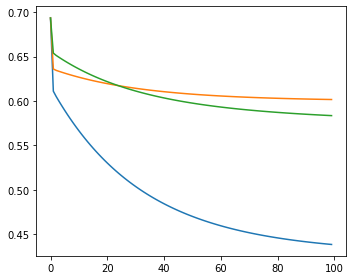

In [9]:
plt.figure(figsize=(5, 4))
plt.plot(range(len(log_regu.cost_score[0])), log_regu.cost_score[0])
plt.plot(range(len(log_regu.cost_score[0])), log_regu.cost_score[1])
plt.plot(range(len(log_regu.cost_score[0])), log_regu.cost_score[2])
plt.tight_layout()
plt.show()

## 10. Compare Logistic Regression model with and without regularisation

In [10]:
log = LogisticRegression(lr=0.001, n_iter=100, regu=None)
theta_w_r = log.fit(X_train, y_train)

theta_w_r = np.array(theta_w_r)
theta = np.array(theta)

print('Theta 0')
pandas.DataFrame({'theta-with-regu': theta[0], 'theta-without-regu': theta_w_r[0]}, columns = ['theta-with-regu', 'theta-without-regu'])

Theta 0


,theta-with-regu,theta-without-regu
0,0.170739,-0.009013
1,-0.698930,-0.080730
2,1.005323,-0.014681


In [11]:
print('Theta 1')
pandas.DataFrame({'theta-with-regu': theta[1], 'theta-without-regu': theta_w_r[1]}, columns = ['theta-with-regu', 'theta-without-regu'])

Theta 1


,theta-with-regu,theta-without-regu
0,-0.008817,-0.010055
1,0.156097,-0.054691
2,-0.531096,-0.040214


In [12]:
print('Theta 2')
pandas.DataFrame({'theta-with-regu': theta[2], 'theta-without-regu': theta_w_r[2]}, columns = ['theta-with-regu', 'theta-without-regu'])

Theta 2


,theta-with-regu,theta-without-regu
0,-0.291840,-0.011251
1,0.296109,-0.041444
2,-0.671958,-0.037877
